# Multiple Linear Regression

## Example 1: Stock Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("../data/S&P500_stock_data.csv")
df.head(n=3)

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337


In [3]:
df.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764328
max,3.000000,70.000000,3000.000000


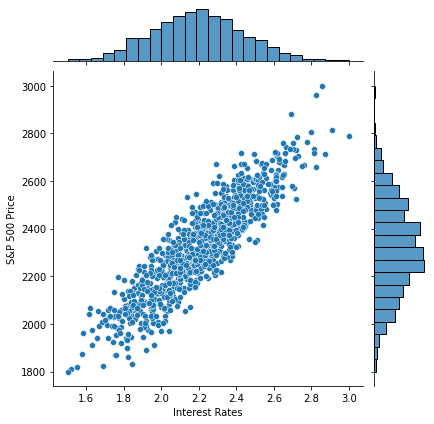

In [4]:
sns.jointplot(x="Interest Rates", y="S&P 500 Price", data=df);

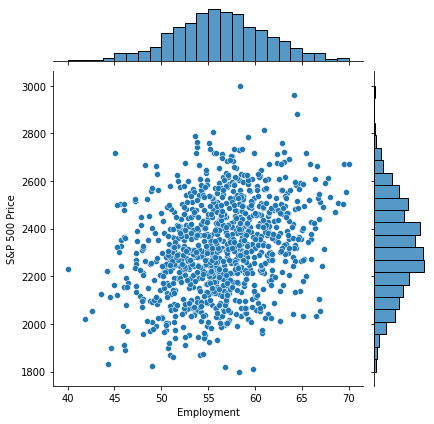

In [5]:
sns.jointplot(x="Employment", y="S&P 500 Price", data=df);

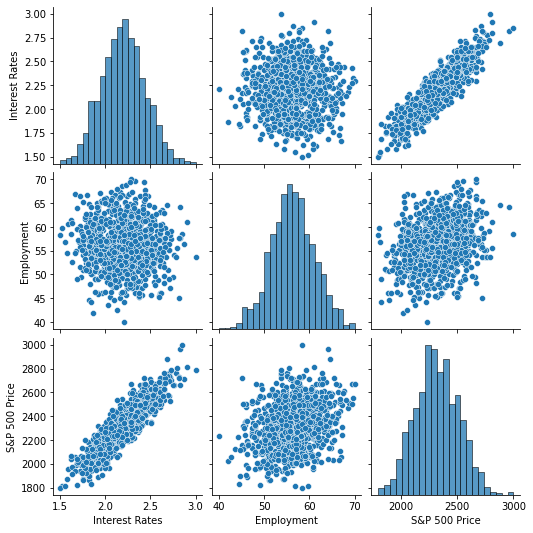

In [6]:
sns.pairplot(df);

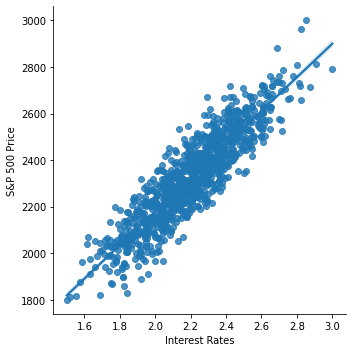

In [7]:
sns.lmplot(x="Interest Rates", y="S&P 500 Price", data=df);

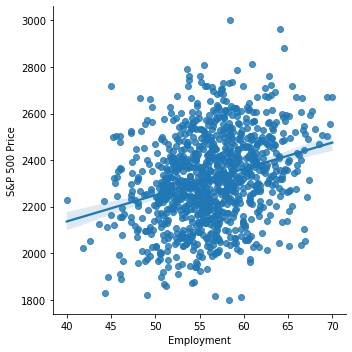

In [8]:
sns.lmplot(x="Employment", y="S&P 500 Price", data=df);

In [9]:
from sklearn.model_selection import train_test_split

X = df[["Interest Rates", "Employment"]]
y = df["S&P 500 Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [10]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, y_train)
print("Coefficients: {}\t Intercept: {}".format(lm.coef_, lm.intercept_))

Coefficients: [730.50972033  12.18926058]	 Intercept: 31.552228079162433


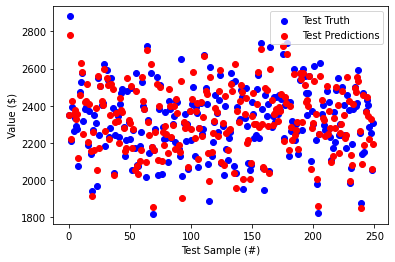

In [11]:
y_predict = lm.predict(X_test)

plt.scatter(list(range(len(y_test))), y_test, c="blue", label="Test Truth")
plt.scatter(list(range(len(y_predict))), y_predict, c="r", label="Test Predictions")
plt.xlabel("Test Sample (#)")
plt.ylabel("Value ($)")
plt.legend();

In [12]:
from mpl_toolkits.mplot3d import Axes3D

In [13]:
x_surf, y_surf = np.meshgrid(
    np.linspace(df["Interest Rates"].min(), df["Interest Rates"].max(), 100),
    np.linspace(df["Employment"].min(), df["Employment"].max(), 100),
)

In [14]:
xs = pd.DataFrame({"Interest Rates": x_surf.ravel(), "Employment": y_surf.ravel()})
ys = lm.predict(xs).reshape(x_surf.shape)

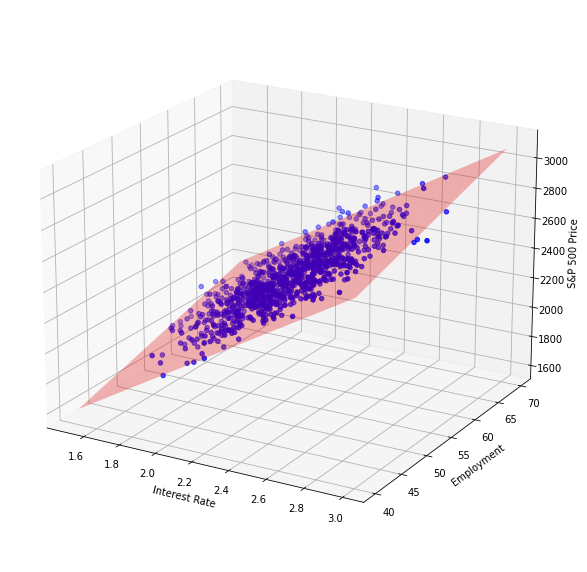

In [15]:
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df["Interest Rates"], df["Employment"], df["S&P 500 Price"], c="b")
ax.plot_surface(x_surf, y_surf, ys, color="red", alpha=0.3)
ax.set_xlabel("Interest Rate")
ax.set_ylabel("Employment")
ax.set_zlabel("S&P 500 Price")
ax.view_init(20, 300);

## Example 2: Admission Data

In [16]:
df = pd.read_csv("../data/admission.csv")
df.head(n=3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [17]:
df.drop(["Serial No."], inplace=True, axis=1)

In [18]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


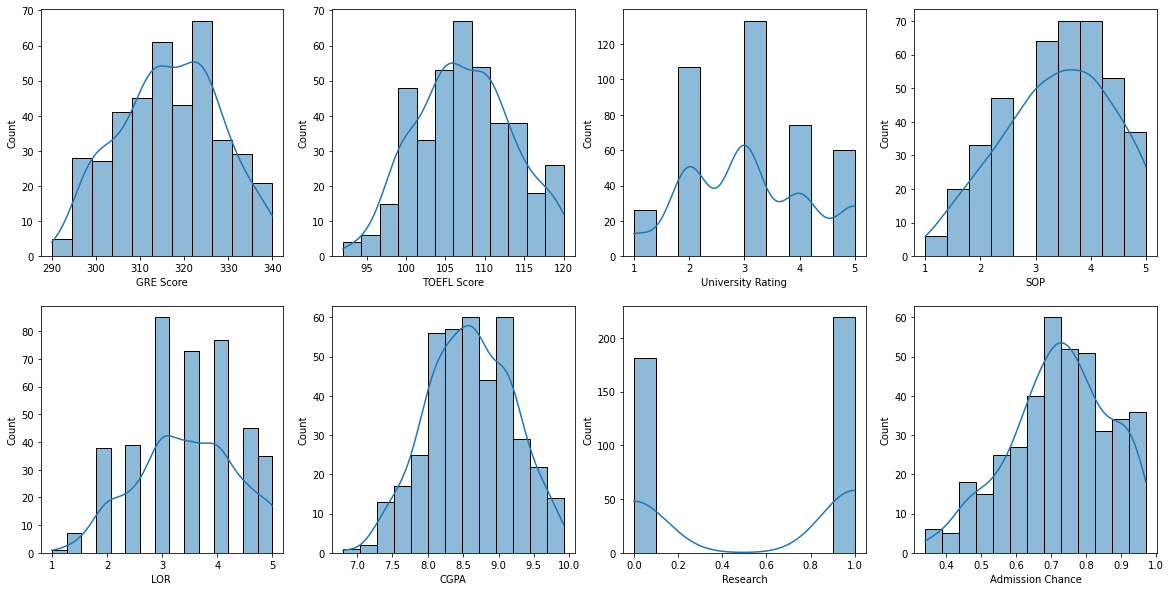

In [19]:
i = 1
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

for col in df.columns:
    plt.subplot(2, 4, i)
    sns.histplot(df[col], kde=True)
    i += 1

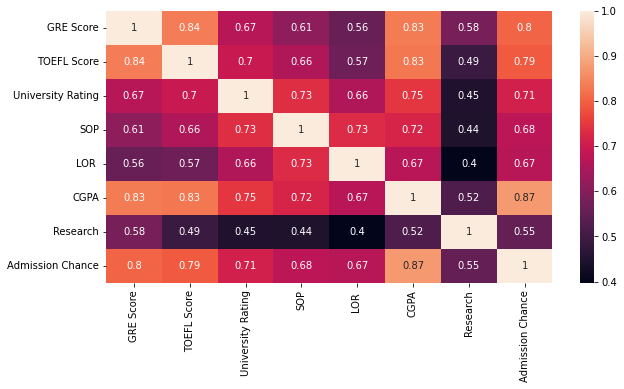

In [20]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True);

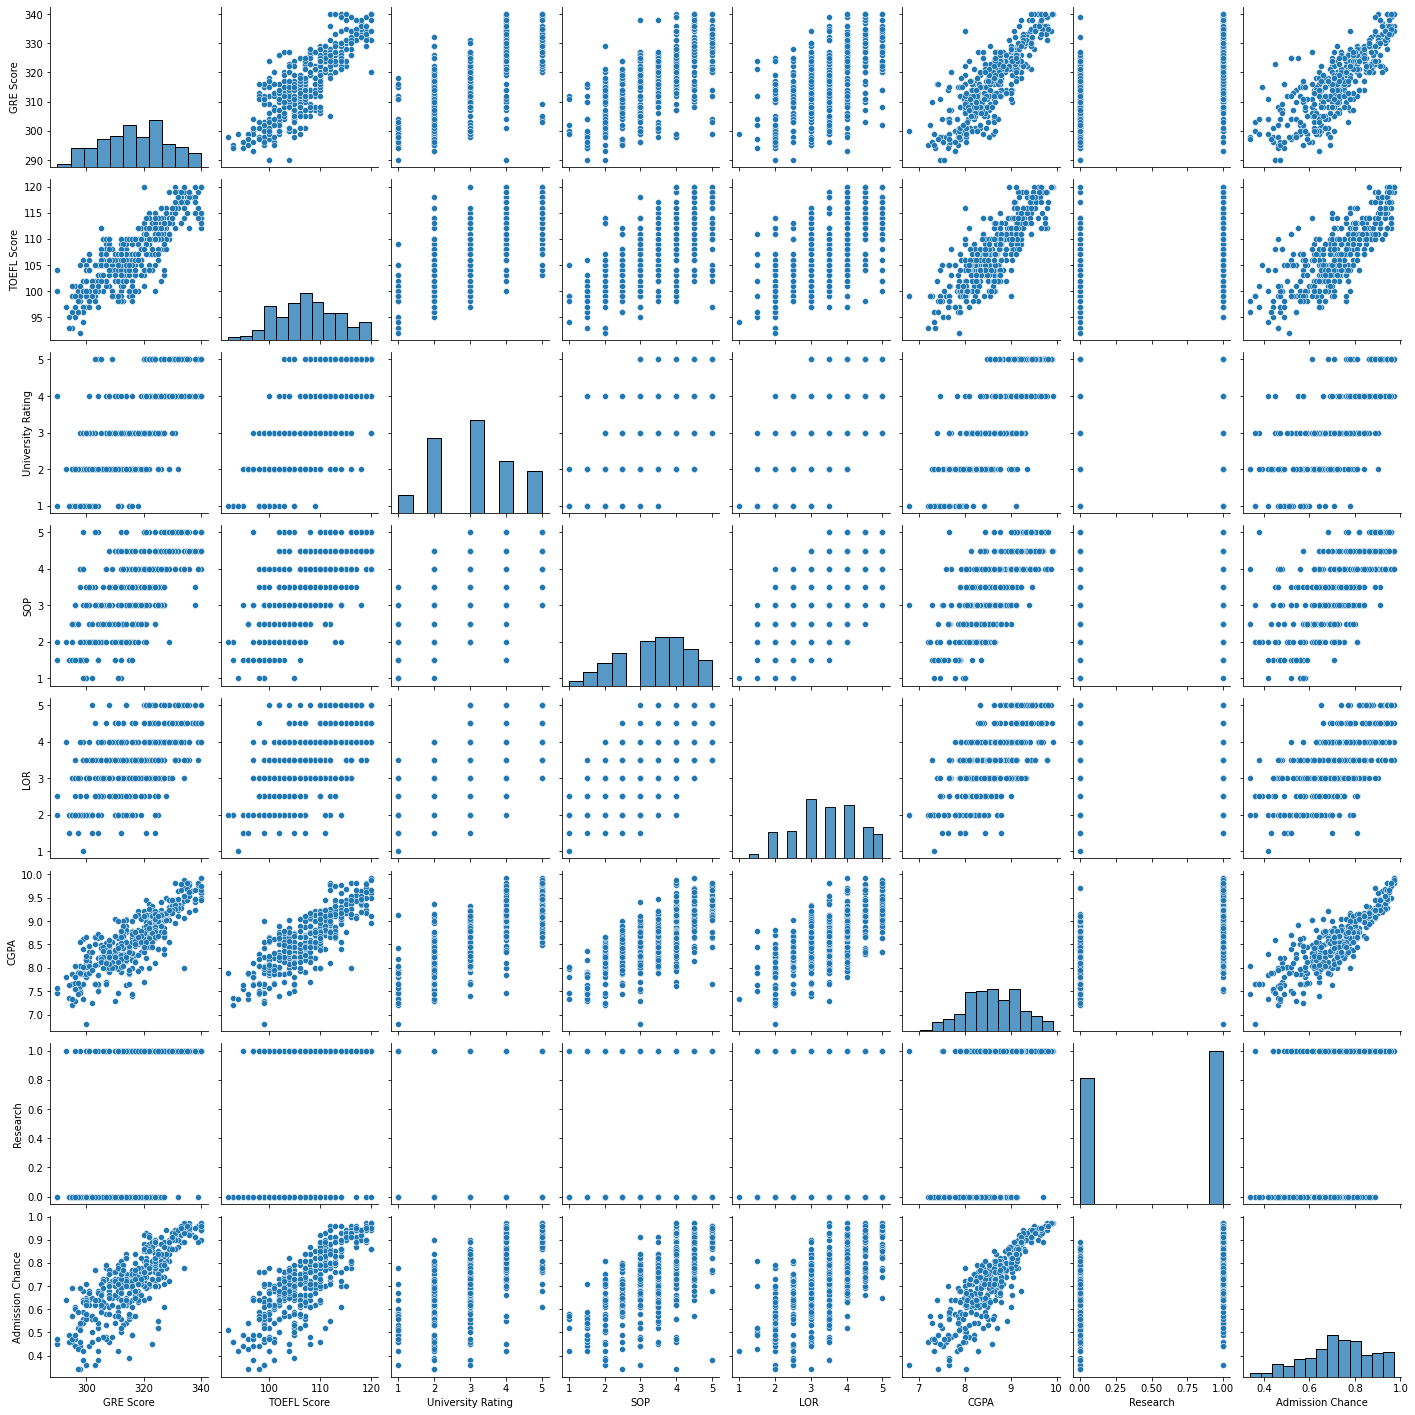

In [21]:
sns.pairplot(df);

In [22]:
X = df.drop(["Admission Chance"], axis=1)
y = df["Admission Chance"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [23]:
lm = LinearRegression().fit(X_train, y_train)
print("Coefficients: {}\t Intercept: {}".format(lm.coef_, lm.intercept_))

Coefficients: [0.00201088 0.0029215  0.00501949 0.00067855 0.01597582 0.11362846
 0.02202891]	 Intercept: -1.2859775261691164


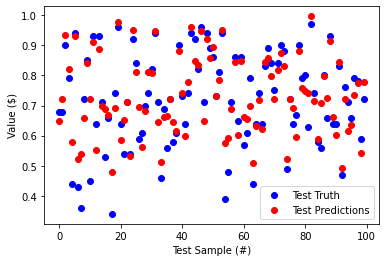

In [24]:
y_predict = lm.predict(X_test)

plt.scatter(list(range(len(y_test))), y_test, c="blue", label="Test Truth")
plt.scatter(list(range(len(y_predict))), y_predict, c="r", label="Test Predictions")
plt.xlabel("Test Sample (#)")
plt.ylabel("Value ($)")
plt.legend();

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

n, k = X_test.shape
r2 = r2_score(y_test, y_predict)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
mape = 100 * np.mean(np.abs((y_test - y_predict) / y_test))

print("R2: {:.5f}".format(r2))
print("Adjusted R2: {:.5f}".format(adj_r2))
print("MEA: {:.5f}".format(mean_absolute_error(y_test, y_predict)))
print("MSE: {:.5f}".format(mean_squared_error(y_test, y_predict)))
print("MAPE: {:.5f}%".format(mape))

R2: 0.81611
Adjusted R2: 0.80212
MEA: 0.04708
MSE: 0.00434
MAPE: 8.11236%
